# 第5章 Logistic回归
接下来我们会介绍几个最优化算法，并利用它们训练一个非线性函数（非一次函数）用于分类。

回归：即用一条直线对一些数据点进行拟合，这条线叫做最佳拟合直线，拟合的过程称为回归。



## 5.1 Logistic回归和Sigmoid函数分类

> Logistic回归：
>
> - 优点：计算代价不高，易于理解和实现。
> - 缺点：容易欠拟合，分类精度可能不高。
> - 适用范围：数值型和标称型。
> - 数据预处理缺失值可以用0来代替（0表示不更新对应的系数，是我们想要的效果）。

首先我们需要一个阶跃函数（有限段分段函数的组合）作为分类器函数，但是单位阶跃函数在跳跃点上从0瞬间到1，这个瞬间跳跃的过程很难处理。所以我们选取更加平滑的但有类似性质的Sigmoid函数：
$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
所以Logistic回归分类器的实现思路为：

1. 随机初始的回归系数矩阵$W$
2. 利用梯度上升法，求自变量是$W$，因变量是$\sigma(W^TX) - Y$ 的最优解，直至收敛
3. 将未知数据带入模型，得出分类结果
4. 大于0.5分为1类，小于0.5分为0类



## 5.2 确定最佳回归系数

Sigmoid函数的输入记为z：
$$
z=w_0x_0+w_1x_1+w_2x_2+···+w_nx_n=W^TX
$$
那么如何确定系数向量$w$，成为了关键。

### 5.2.1 梯度上升法

介绍的第一个优化系数向量$w$的算法叫做梯度上升法。基本思想是：要找到某函数的最大值，最好的方法是验证该函数的梯度方向探寻。梯度用$\nabla$表示，那么函数$f(x,y)$的梯度由下式表示：
$$
\nabla f(x,y)=
\begin{pmatrix}
  \frac{\partial f(x,y)}{\partial x} \\
  \frac{\partial f(x,y)}{\partial y} \\
\end{pmatrix}
$$

> 其中偏微分符号$\partial $ ，读作partial 或者 tho

这个梯度意味着要沿x的方向移动$\frac{\partial f(x,y)}{\partial x}$，沿y的方向移动$\frac{\partial f(x,y)}{\partial x}$。要注意的是这个计算是不停迭代的，移动到新的点p后要重新计算新的梯度。

那我们有了移动的方向，但是并未提及移动的长度，即步长，计作$\alpha$，所以最终系数向量$w$的迭代公式为：
$$
w:=w+\alpha \nabla_wf(w)
$$
该公式将一直被迭代，直到达到某个条件后停止。

> 最常听到的应该是梯度下降算法，它与这里的梯度上升算法一致，只是加法变减法：
> $$
 w:=w-\alpha \nabla_wf(w)
 $$
> 梯度上升法用来求函数的最大值；梯度下降法用来求函数的最小值。
>
> 问题是，为什么Logistic回归是找函数的最大值？ToDo



### 5.2.2 代码实现

代码实现如下，其中最难以理解的就是如何用代码实现梯度上升算法`weights = weights + alpha * dataMatrix.transpose() * error`

为什么公式的具体实现只是(1)
$$
\begin{align}
w &:=w+ \alpha ·x^T·e \tag{1} \\
e &= y-\sigma(wx) \tag{2}
\end{align}
$$
也就是，为什么$\nabla_wf(w) = x^T·e $，参考链接如下：https://www.zhihu.com/question/24658302/answer/111572591



> [代码参考链接](https://github.com/wzy6642/Machine-Learning-in-Action-Python3/blob/master/Logistic_Project1/Logistic.py)



In [1]:
import numpy as np


def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMath, classLabels):
    # 转换成numpy的mat(矩阵)
    dataMatrix = np.mat(dataMath)
    # 转换成numpy的mat(矩阵)并进行转置
    labelMat = np.mat(classLabels).transpose()
    # 返回dataMatrix的大小，m为行数，n为列数
    m, n = np.shape(dataMatrix)
    # 移动步长，也就是学习效率，控制更新的幅度
    alpha = 0.01
    # 最大迭代次数
    maxCycles = 500
    weights = np.ones((n, 1))
    weights_array = np.array([])
    for k in range(maxCycles):
        # 梯度上升矢量化公式
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
        # numpy.append(arr, values, axis=None):就是arr和values会重新组合成一个新的数组，做为返回值。
        # 当axis无定义时，是横向加成，返回总是为一维数组
        weights_array = np.append(weights_array, weights)
    weights_array = weights_array.reshape(maxCycles, n)
    # 将矩阵转换为数组，返回权重数组
    # mat.getA()将自身矩阵变量转化为ndarray类型变量
    return weights.getA(), weights_array

In [2]:
def loadDataSet():
    # 创建数据列表
    dataMat = []
    # 创建标签列表
    labelMat = []
    # 打开文件
    fr = open('data/Ch05/testSet.txt')
    # 逐行读取
    for line in fr.readlines():
        # 去掉每行两边的空白字符，并以空格分隔每行数据元素
        lineArr = line.strip().split()
        # 添加数据
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        # 添加标签
        labelMat.append(int(lineArr[2]))
    # 关闭文件
    fr.close()
    # 返回
    return dataMat, labelMat

 # 加载数据集
dataMat, labelMat = loadDataSet()
# weights2训练后的权重；weights_array2用作后面画图使用
weights2, weights_array2 = gradAscent(dataMat, labelMat)
weights2

array([[12.78439299],
       [ 1.1182076 ],
       [-1.74082679]])

### 5.2.3 决策边界

> [参考链接](https://zhuanlan.zhihu.com/p/103460567)

通过梯度上升我们计算出来了权重系数向量，那这个权重系数的几何意义是什么呢？

通过训练的方式求出一个n+1维向量$w$，每当新来一个样本$x_b$时，与向量$w$进行点乘，结果带入sigmoid函数，得到的值为该样本发生我们定义的事件 发生的概率值。如果概率大于0.5，分类为1；否则分类为0。

对于公式：
$$
\sigma(x)=\frac{1}{1+e^{-x}} \quad x=w^T·x_b
$$
当$w^T·x_b=0$时，$\sigma(x)=\frac{1}{2}$，当$w^T·x_b>0$时，$\sigma(x)>\frac{1}{2}$，$w^T·x_b<0$时，$\sigma(x)<\frac{1}{2}$

所以当$w^T·x=0$时，就称之为决策边界，假设次数据集有两个特征，那么：
$$
w^T·x=w_0+w_1x_1+w_2x_2=0
$$
写成我们熟悉的方式为：
$$
x_2=\frac{-w_0-w_1x}{w_2}  \tag{3}
$$


可见不论有多少个特征，决策边界都是一条直线，将数据集一分为二。用python得matplotlib库可以很好的绘制这条直线：

```python
fig = plt.figure()
ax = fig.add_subplot(111)
# 创建数值范围并返回 ndarray 对象 numpy.arange(start, stop, step, dtype)
x = np.arange(-3.0, 3.0, 0.1)
# 即上述公式3
y = (-weights[0] - weights[1] * x) / weights[2]
type3 = ax.plot(x, y)
```

### 

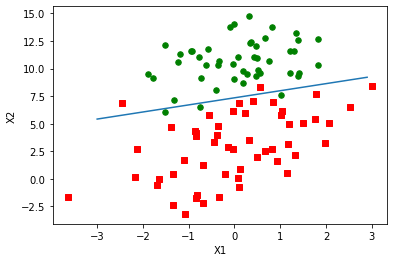

In [3]:
from matplotlib import pyplot as plt

xcord1 = []
ycord1 = []
xcord2 = []
ycord2 = []
dataArr = np.array(dataMat)
weights = weights2

for i in range(np.shape(dataArr)[0]):
    if int(labelMat[i]) == 1:
        xcord1.append(dataArr[i, 1])
        ycord1.append(dataArr[i, 2])
    else:
        xcord2.append(dataArr[i, 1])
        ycord2.append(dataArr[i, 2])

fig = plt.figure()
ax = fig.add_subplot(111)
type1 = ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
type2 = ax.scatter(xcord2, ycord2, s=30, c='green')
x = np.arange(-3.0, 3.0, 0.1)
y = (-weights[0] - weights[1] * x) / weights[2]
type3 = ax.plot(x, y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5.2.4 随机梯度上升

我们可以看到，在上面的梯度上升法中，`weights = weights + alpha * dataMatrix.transpose() * error`每次更新都需要所有样本的计算量，这在大批量数据集上是不现实的，所以对应的随机梯度上升，用一个样本的数据做计算：`weights = weights + alpha * dataMatrix[i].transpose() * error`，然后计算完所有的数据为一次迭代。

还有一处改动为将步长`alpha = 4/(1.0+j+i)+0.01`改为动态调整，随着迭代次数的增加，步长变短，系数收敛的同时高频波动，其中一个原因就是随着系数的收敛，函数的斜率相对于步长，变得越来越小，所以需要调整步长，避免波动。

还有一种震荡是周期性的震荡，这是因为样本数据本身的小问题以及每次都按顺序做梯度上升，我们只需要每轮迭代都用随机的样本顺序做梯度上升：`randIndex = int(random.uniform(0, len(dataIndex)))`
代码如下：

In [13]:
import random


def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    # 参数初始化
    weights = np.ones(n)
    weights_array = np.array([])
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 每次都降低alpha的大小
            alpha = 4/(1.0+j+i)+0.01
            # 随机选择样本，选择的会在后面删除
            randIndex = int(random.uniform(0, len(dataIndex)))
            # 随机选择一个样本计算h
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            # 计算误差
            error = classLabels[randIndex] - h
            # 更新回归系数
            weights = weights + alpha * error * dataMatrix[randIndex]
            # 删除已使用的样本
            del(dataIndex[randIndex])
        # 添加返回系数到数组中当axis为0时，数组是加在下面（列数要相同）
        weights_array = np.append(weights_array, weights, axis=0)
    # 改变维度
    weights_array = weights_array.reshape(numIter, n)
    # 返回
    return weights, weights_array

weights1, weights_array1 = stocGradAscent1(np.array(dataMat), labelMat)
weights1

array([13.99882814,  0.79785635, -2.09697862])

绘制随机梯度求得的决策边界如下，可以看到整体效果还不错。但是我们的计算量急速下降，首先迭代次数默认150。

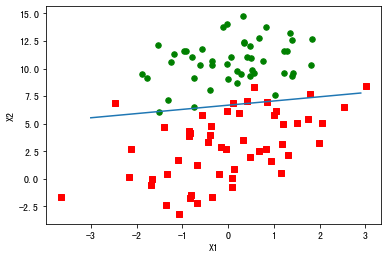

In [14]:
weights = weights1

fig = plt.figure()
ax = fig.add_subplot(111)
type1 = ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
type2 = ax.scatter(xcord2, ycord2, s=30, c='green')
x = np.arange(-3.0, 3.0, 0.1)
y = (-weights[0] - weights[1] * x) / weights[2]
type3 = ax.plot(x, y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5.2.5 性能分析

mac操作系统下，plt有中文问题，解决方法如下：[参考链接](https://blog.csdn.net/D_Ddd0701/article/details/113743015)

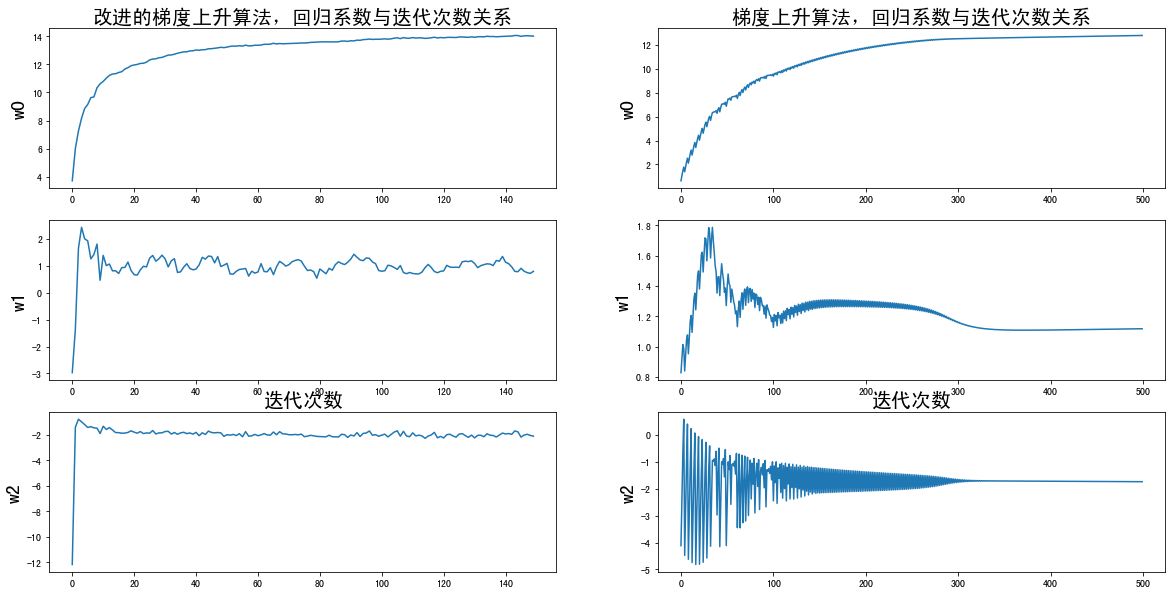

In [15]:

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，黑体的 name 为 SimHei
plt.rcParams['font.size'] = 10  # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号，跟是否显示中文没关系，你可以考虑加或不加


fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(20, 10))
# x1坐标轴的范围
x1 = np.arange(0, len(weights_array1), 1)
# 绘制w0与迭代次数的关系
axs[0][0].plot(x1, weights_array1[:, 0])
axs0_title_text = axs[0][0].set_title(u'改进的梯度上升算法，回归系数与迭代次数关系')
axs0_ylabel_text = axs[0][0].set_ylabel(u'w0')
plt.setp(axs0_title_text, size=20, weight='bold', color='black')
plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
# 绘制w1与迭代次数的关系
axs[1][0].plot(x1, weights_array1[:, 1])
axs1_ylabel_text = axs[1][0].set_ylabel(u'w1')
plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
# 绘制w2与迭代次数的关系
axs[2][0].plot(x1, weights_array1[:, 2])
axs2_title_text = axs[2][0].set_title(u'迭代次数')
axs2_ylabel_text = axs[2][0].set_ylabel(u'w2')
plt.setp(axs2_title_text, size=20, weight='bold', color='black')
plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')

# x2坐标轴的范围
x2 = np.arange(0, len(weights_array2), 1)
# 绘制w0与迭代次数的关系
axs[0][1].plot(x2, weights_array2[:, 0])
axs0_title_text = axs[0][1].set_title(u'梯度上升算法，回归系数与迭代次数关系')
axs0_ylabel_text = axs[0][1].set_ylabel(u'w0')
plt.setp(axs0_title_text, size=20, weight='bold', color='black')
plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
# 绘制w1与迭代次数的关系
axs[1][1].plot(x2, weights_array2[:, 1])
axs1_ylabel_text = axs[1][1].set_ylabel(u'w1')
plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
# 绘制w2与迭代次数的关系
axs[2][1].plot(x2, weights_array2[:, 2])
axs2_title_text = axs[2][1].set_title(u'迭代次数')
axs2_ylabel_text = axs[2][1].set_ylabel(u'w2')
plt.setp(axs2_title_text, size=20, weight='bold', color='black')
plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')

plt.show()

## 5.3 本章小结

Logistic回归，即用一条直线对数据进行回归。回归方程：$w^Tx$，并使用平滑阶跃函数Sigmoid:$\sigma(x)=\frac{1}{1+e^{-x}}$，损失函数$Loss(h_\sigma(x),y)=h_\sigma(x)^y(1-h_\sigma(x))^{(1-y)}$.

然后使用梯度上升法不断优化权重$w:=w+ \alpha ·x^T·e $


sigmoid激活函数缺点：
1. 梯度消失：因为自变量取值越大或越小，斜率逐渐为0
2. 函数图像不关于原点对称（函数值全为正的），导致收敛呈阶梯状（改进版：Tanh函数）
